# Introduction to quantum algorithms with [Qiskit](https://qiskit.org)
$$
\newcommand{\ket}[1]{|#1\rangle}
\newcommand{\Ket}[1]{\left|#1\right\rangle}
\newcommand{\bra}[1]{\langle#1|}
\newcommand{\Bra}[1]{\left\langle#1\right|}
\newcommand{\braket}[1]{\langle#1\rangle}
\newcommand{\u}{\ket\uparrow}
\newcommand{\ub}{\bra\uparrow}
\newcommand{\d}{\ket\downarrow}
\newcommand{\db}{\bra\downarrow}
$$

In [36]:
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_state

qbackend = Aer.get_backend('qasm_simulator')
sbackend = Aer.get_backend('statevector_simulator')
ubackend = Aer.get_backend('unitary_simulator')
qiskit.__version__

'0.8.2'

## Quantum state vs classical state
- [Double slit experiment](https://www.youtube.com/watch?v=Q1YqgPAtzho)
- [Stern-Gerlach experiment](https://www.youtube.com/watch?v=PH1FbkLVJU4)
- [Light & QM](https://www.youtube.com/watch?v=MzRCDLre1b4)
### Reading:
- Michael A. Nielsen & Isaac L. Chuang: Quantum Computation and Quantum Information (10th edition)
- [Qiskit online textbook](https://qiskit.org/textbook/preface.html)
- [What we can learn about quantum physics from a single qubit](https://arxiv.org/pdf/1312.1463.pdf)

### What is a quantum state?
- Objects in the quantum world are described by an element class in the Hilbert-space:
$$
\ket\psi \equiv e^{i\varphi}\ket\psi, \forall \varphi\in \mathbb R\\
||\psi|| = \sqrt{\braket{\psi|\psi}} \overset{!}{=} 1
$$
- Hilbert spaces are vector spaces with scalar product $\braket{\cdot|\cdot}: \mathcal H
\rightarrow \mathbb C$:
    - $\braket{\psi|\psi} \geq 0$
    - $\braket{x|y} = \braket{y|x}^*$
    - $\braket{x|\alpha y + \beta z} = \alpha\braket{x|y} + \beta\braket{x|z}$

### Qubits:
- <b>the qubit is the simplest possible quantum mechanical state</b>
- $\ket 0 = \u = \ket\circlearrowright = \begin{bmatrix}1\\0\end{bmatrix}$
- $\ket 1 = \d = \ket\circlearrowleft = \begin{bmatrix}0\\1\end{bmatrix}$
- $\ket\psi = \alpha\ket 0 + \beta\ket 1 = \begin{bmatrix}\alpha\\\beta\end{bmatrix},
|\alpha|^2 + |\beta|^2 = 1$
- $P(0) = P(\uparrow) = |\braket{0|\psi}|^2 = |\alpha|^2$
- $P(1) = P(\downarrow) = |\braket{1|\psi}|^2 = |\beta|^2$

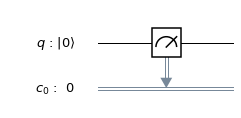

In [17]:
qreg = QuantumRegister(1)

circ = QuantumCircuit(1,1)
circ.measure(0,0)

circ.draw(output='mpl')

State: [1.+0.j 0.+0.j]


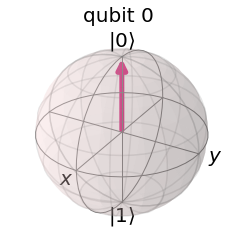

In [27]:
job = execute( circ, sbackend, shots=100 )
state = job.result().get_statevector()
print("State:", state)
plot_bloch_multivector(state)

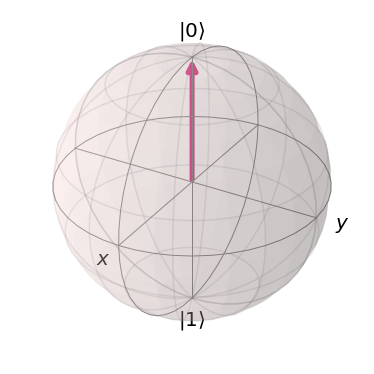

In [34]:
from qiskit.visualization import plot_state_qsphere
plot_state_qsphere()

### Unitary matrix
- $U = \begin{bmatrix}a&b\\c&d\end{bmatrix}$
- $U^{\dagger} = (U^{\top})^* = \begin{bmatrix}a^*&c^*\\b^*&d^*\end{bmatrix}$
- $U$ is unitary $\iff U^{\dagger} = U^{-1} \iff UU^{\dagger} = U^{\dagger}U = \mathbb 1$ 

## Quantum gates
- <b>Any unitary matrix can be used as a quantum logic gate!</b>

### Single qubit gates:
- $X$ or NOT gate:
    $$X = \begin{bmatrix}0&1\\1&0\end{bmatrix}$$
- $Y$ gate:
    $$Y = \begin{bmatrix}0&-i\\i&0\end{bmatrix}$$
- $Z$ gate:
    $$Z = \begin{bmatrix}1&0\\0&-1\end{bmatrix}$$
- Phase shift gate:
    $$R_{\phi} = \begin{bmatrix}1&0\\0&e^{i\phi}\end{bmatrix}$$
- Hadamard gate:
    $$H = \frac{1}{\sqrt 2}\begin{bmatrix}1&1\\1&-1\end{bmatrix}$$
- $\sqrt X$ or $\sqrt{\text{NOT}}$ gate
    $$ \sqrt X = \frac{1}{2} \begin{bmatrix} 1+i & 1-i \\ 1-i & 1+i\end{bmatrix} $$

### Two-qubit gates
- SWAP:
    $$SWAP = \begin{bmatrix}
    1&0&0&0\\
    0&0&1&0\\
    0&1&0&0\\
    0&0&0&1
    \end{bmatrix}$$
- $\sqrt{\text{SWAP}}$:
    $$\sqrt{\text{SWAP}} = \begin{bmatrix}
    1&0&0&0\\
    0&\frac{1}{2}(1+i)&\frac{1}{2}(1-i)&0\\
    0&\frac{1}{2}(1-i)&\frac{1}{2}(1+i)&0\\
    0&0&0&1
    \end{bmatrix}$$
- cX or cNOT:
    $$cX = \begin{bmatrix}
    1&0&0&0\\
    0&1&0&0\\
    0&0&0&1\\
    0&0&1&0
    \end{bmatrix}$$
- cU:
    - If $U = \begin{bmatrix}a&b\\c&d\end{bmatrix}$, then
    $$cU = \begin{bmatrix}
    1&0&0&0\\
    0&1&0&0\\
    0&0&a&b\\
    0&0&c&d
    \end{bmatrix}$$